# The Product Pricer Continued

A model that can estimate how much something costs, from its description.

## Data Curation Part 2

Today we'll extend our dataset to a greater coverage, and craft it into an excellent dataset for training.  
Data curation can seem less exciting than other things we work on, but it's a crucial part of the LLM engineers' responsibility and an important craft to hone, so that you can build your own commercial solutions with high quality datasets.

The dataset is here:  
https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023

And the folder with all the product datasets is here:  
https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/tree/main/raw/meta_categories

## Important Note - read me first please

We are about to craft a massive dataset of 400,000 items covering multiple types of product. In Week 7 we will be using this data to train our own model. It's a pretty big dataset, and depending on the GPU you select, training could take 20+ hours. It will be really good fun, but it could cost a few dollars in compute units.

As an alternative, if you want to keep things quick & low cost, you can work with a smaller dataset focused only on Home Appliances. You'll be able to cover the same learning points; the results will be good -- not quite as good as the full dataset, but still pretty amazing! If you'd prefer to do this, I've set up an alternative jupyter notebook in this folder called `lite.ipynb` that you should use in place of this one.

Also, if you'd prefer, you can shortcut running all this data curation by downloading the pickle files that we save in the last cell. The pickle files are available here: https://drive.google.com/drive/folders/1f_IZGybvs9o0J5sb3xmtTEQB3BXllzrW

In [1]:
# import 
import os 
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetDict

# import matplotlib 
import matplotlib.pyplot as plt 

In [2]:
load_dotenv(override=True)

True

In [3]:
hf_token=os.getenv("HF_TOKEN")

In [4]:
# loging to hugging face 
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


## Load items using itemloader.py program 

In [5]:
from loaders import ItemLoader
from items import Item

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

In [6]:
# Load in the same dataset as last time
items = ItemLoader("Home_and_Kitchen").load()

Loading dataset Home_and_Kitchen


README.md: 0.00B [00:00, ?B/s]

Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

raw/meta_categories/meta_Home_and_Kitche(…):   0%|          | 0.00/11.8G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/21 [00:00<?, ?it/s]

100%|██████████| 3736/3736 [1:06:22<00:00,  1.07s/it]


Completed Home_and_Kitchen with 1,112,910 datapoints in 74.1 mins


## Now to SCALE UP

Let's look at all datasets of all the items that you might find in a large home retail store - electrical, electronic, office and related, but not clothes / beauty / books.

In [7]:
dataset_names = [
    # "Automotive",
    "Electronics",
    "Office_Products",
    "Tools_and_Home_Improvement",
    # "Cell_Phones_and_Accessories",
    # "Toys_and_Games",
    "Appliances",
    # "Musical_Instruments",
]

In [8]:
items = []
for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load(6))


Loading dataset Electronics


raw/meta_categories/meta_Electronics.jso(…):   0%|          | 0.00/5.25G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/1610012 [00:00<?, ? examples/s]

100%|██████████| 1611/1611 [03:50<00:00,  6.99it/s]


Completed Electronics with 443,473 datapoints in 7.2 mins
Loading dataset Office_Products


raw/meta_categories/meta_Office_Products(…):   0%|          | 0.00/2.15G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

100%|██████████| 711/711 [01:19<00:00,  8.96it/s]


Completed Office_Products with 240,394 datapoints in 2.8 mins
Loading dataset Tools_and_Home_Improvement


raw/meta_categories/meta_Tools_and_Home_(…):   0%|          | 0.00/4.85G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

100%|██████████| 1474/1474 [04:41<00:00,  5.24it/s]


Completed Tools_and_Home_Improvement with 541,051 datapoints in 7.8 mins
Loading dataset Appliances


raw/meta_categories/meta_Appliances.json(…):   0%|          | 0.00/285M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

100%|██████████| 95/95 [00:18<00:00,  5.06it/s]


Completed Appliances with 28,625 datapoints in 0.6 mins


In [9]:
print(f"A grand total of {len(items):,} items")

A grand total of 1,253,543 items


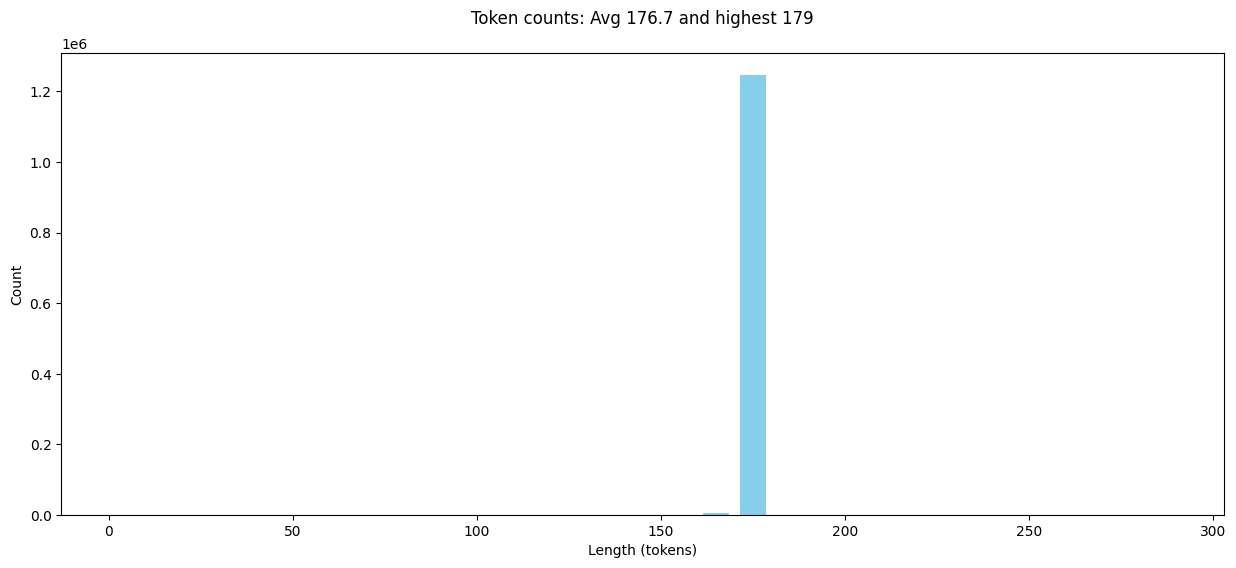

In [10]:
# Plot the distribution of token counts again

tokens = [item.token_count for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="skyblue", bins=range(0, 300, 10))
plt.show()

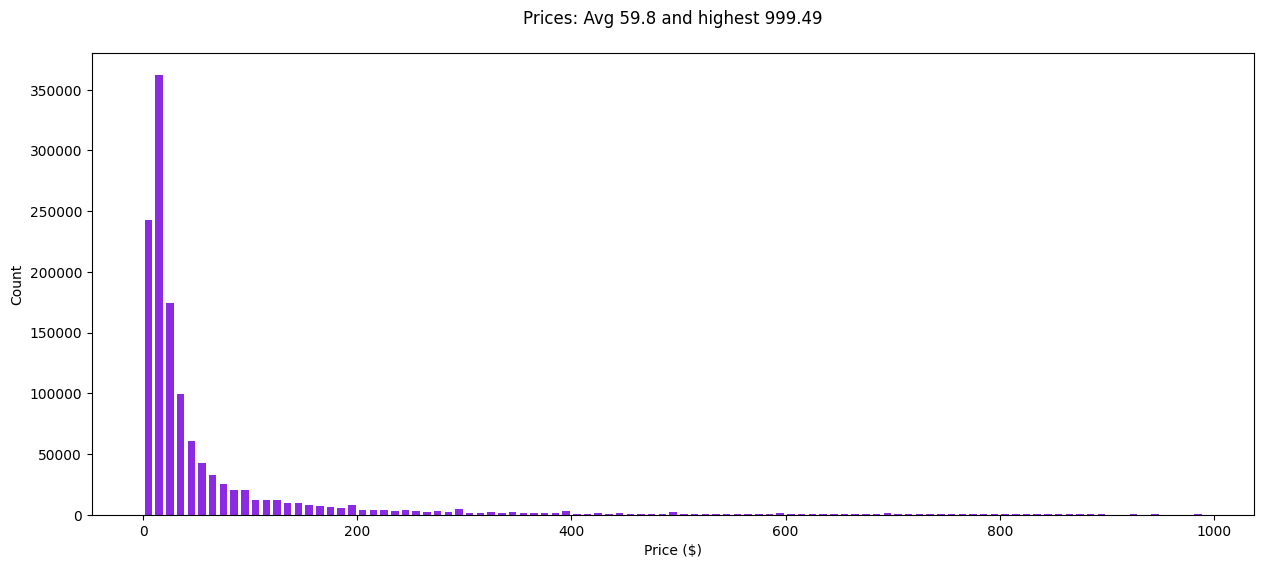

In [11]:
# Plot the distribution of prices

prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="blueviolet", bins=range(0, 1000, 10))
plt.show()

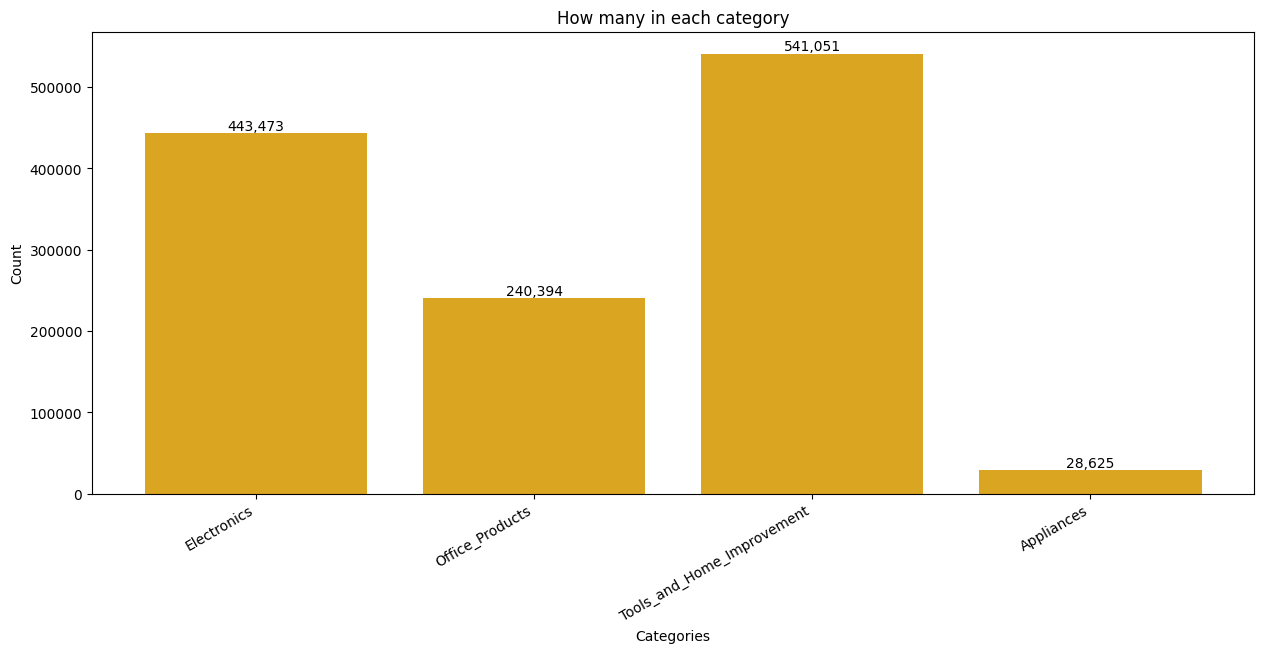

In [12]:
from collections import Counter, defaultdict

category_counts = Counter()
for item in items:
    category_counts[item.category]+=1

categories = category_counts.keys()
counts = [category_counts[category] for category in categories]

# Bar chart by category
plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color="goldenrod")
plt.title('How many in each category')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.xticks(rotation=30, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

# Display the chart
plt.show()

# Objective

Craft a dataset which is more balanced in terms of prices. Less heavily scewed to cheap items, with an average that's higher than $60. Try to balance out the categories - fewer Automotive items.

In [13]:
# Create a dict with a key of each price from $1 to $999
# And in the value, put a list of items with that price (to nearest round number)

slots = defaultdict(list)
for item in items:
    slots[round(item.price)].append(item)

In [15]:
# Create a dataset called "sample" which tries to more evenly take from the range of prices
# And gives more weight to items from categories other than Automotive
# Set random seed for reproducibility
import numpy as np 
import random 

np.random.seed(42)
random.seed(42)
sample = []
for i in range(1, 1000):
    slot = slots[i]
    if i>=240:
        sample.extend(slot)
    elif len(slot) <= 1200:
        sample.extend(slot)
    else:
        weights = np.array([1 if item.category=='Automotive' else 5 for item in slot])
        weights = weights / np.sum(weights)
        selected_indices = np.random.choice(len(slot), size=1200, replace=False, p=weights)
        selected = [slot[i] for i in selected_indices]
        sample.extend(selected)

print(f"There are {len(sample):,} items in the sample")

There are 268,381 items in the sample


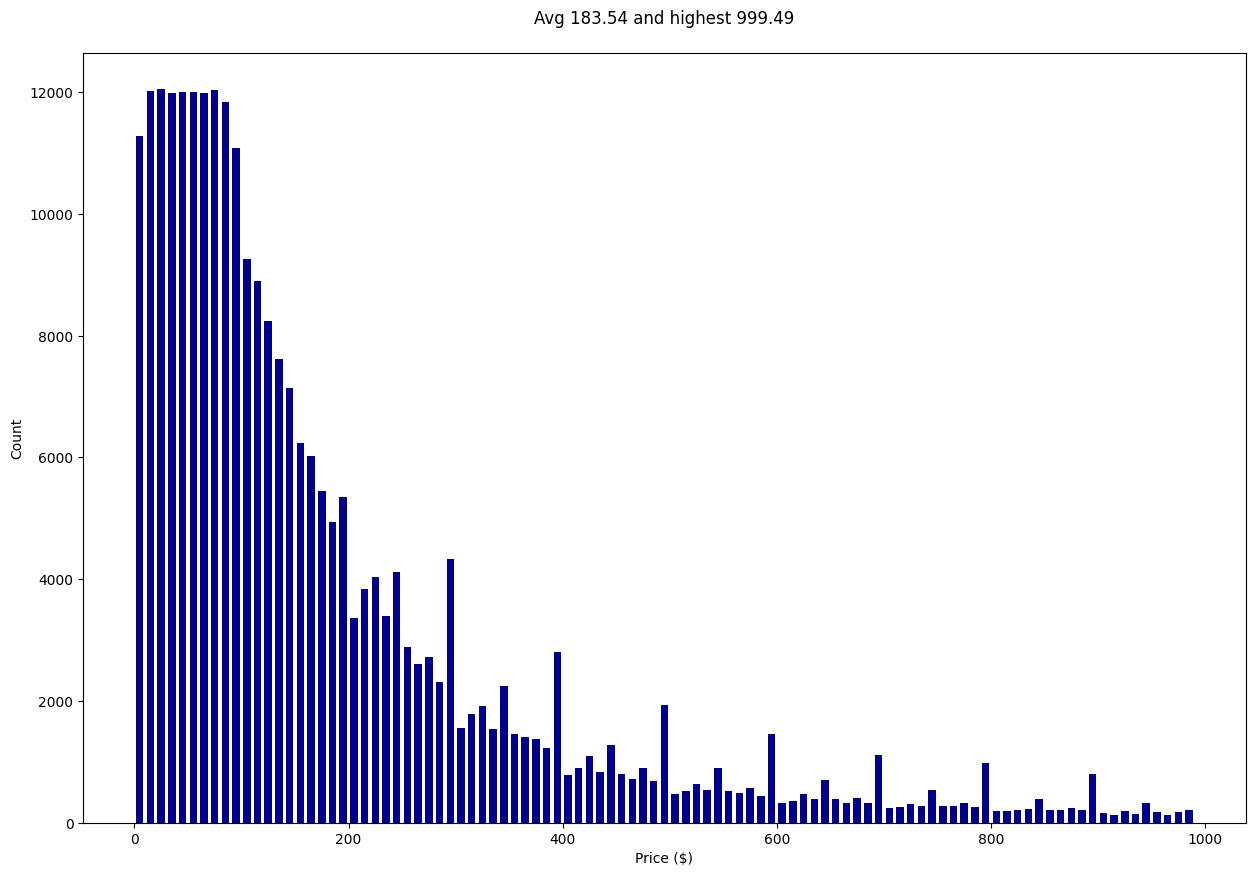

In [16]:
# Plot the distribution of prices in sample

prices = [float(item.price) for item in sample]
plt.figure(figsize=(15, 10))
plt.title(f"Avg {sum(prices)/len(prices):.2f} and highest {max(prices):,.2f}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="darkblue", bins=range(0, 1000, 10))
plt.show()

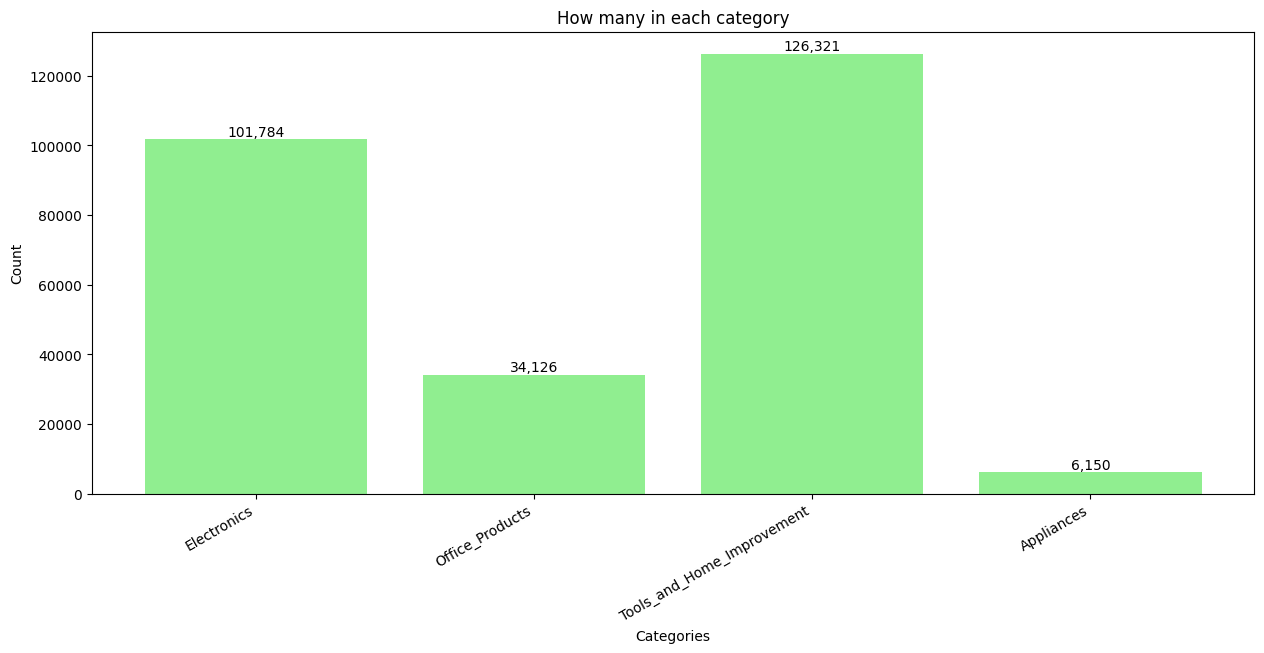

In [17]:
# OK, we did well in terms of raising the average price and having a smooth-ish population of prices
# Let's see the categories

category_counts = Counter()
for item in sample:
    category_counts[item.category]+=1

categories = category_counts.keys()
counts = [category_counts[category] for category in categories]

# Create bar chart
plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color="lightgreen")

# Customize the chart
plt.title('How many in each category')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.xticks(rotation=30, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

# Display the chart
plt.show()

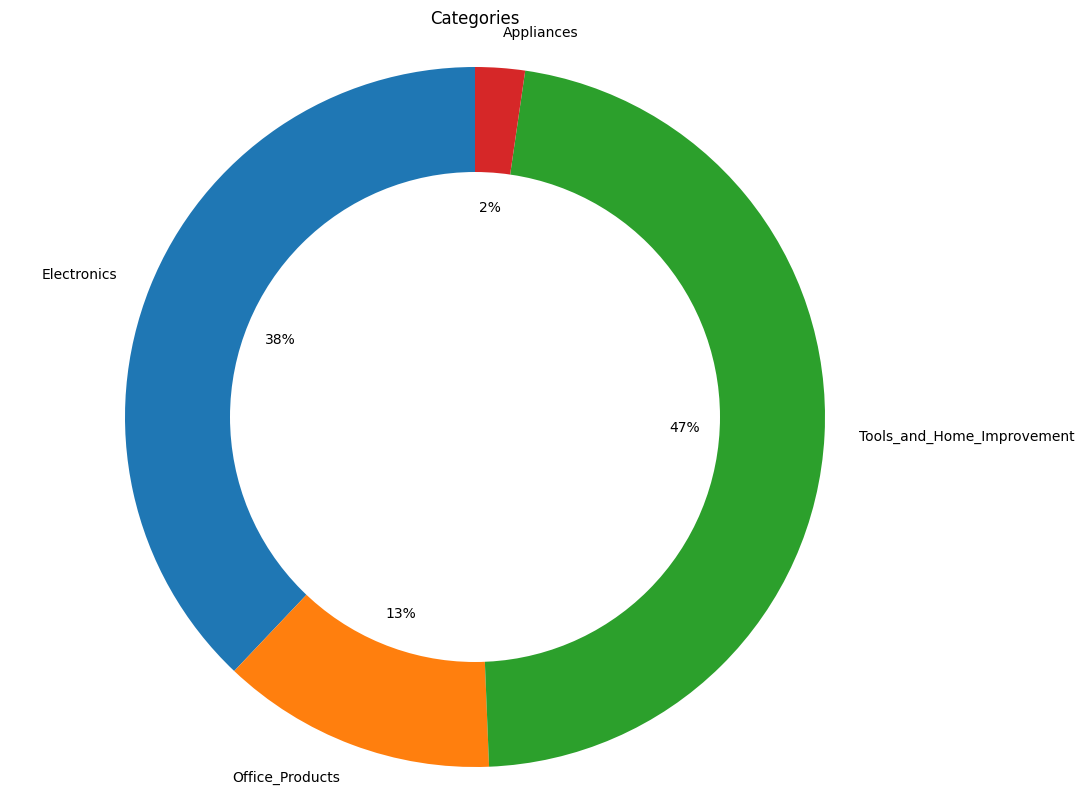

In [18]:
# Automotive still in the lead, but improved somewhat
# For another perspective, let's look at a pie

plt.figure(figsize=(12, 10))
plt.pie(counts, labels=categories, autopct='%1.0f%%', startangle=90)

# Add a circle at the center to create a donut chart (optional)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Categories')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

plt.show()

# Dataset Curated!

We've crafted an excellent dataset.

Let's do some final checks

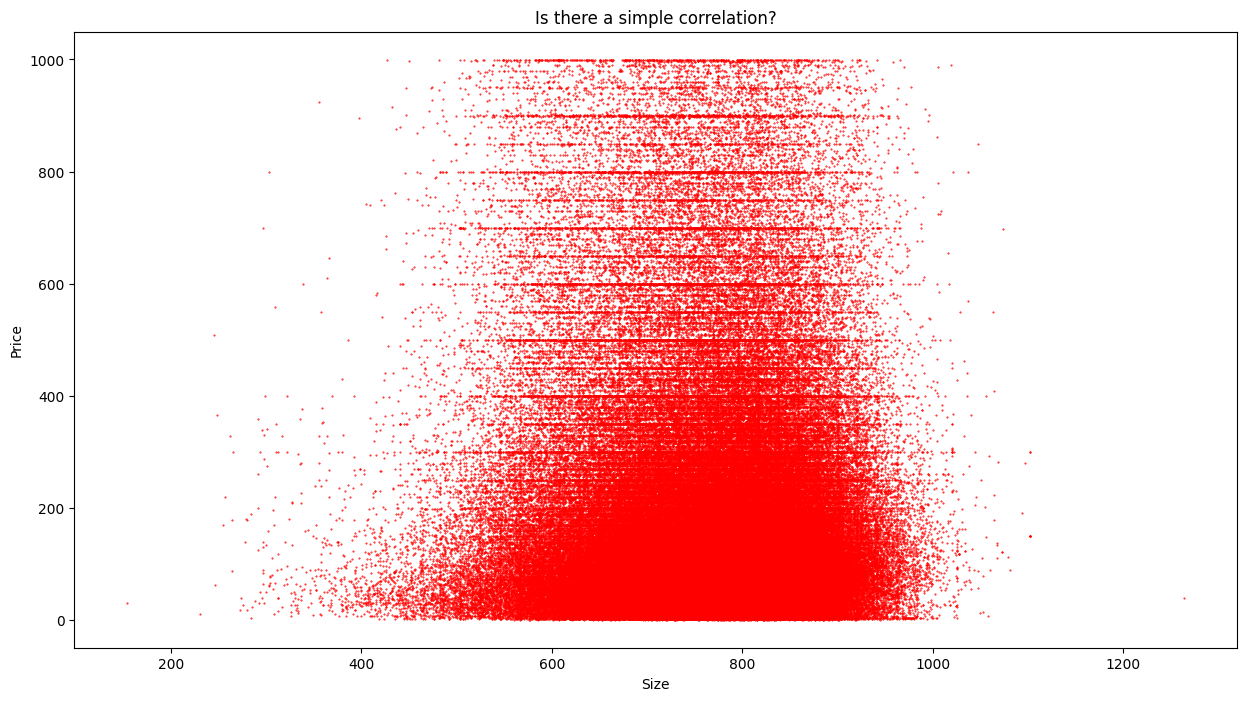

In [19]:
# How does the price vary with the character count of the prompt?

sizes = [len(item.prompt) for item in sample]
prices = [item.price for item in sample]

# Create the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(sizes, prices, s=0.2, color="red")

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Is there a simple correlation?')

# Display the plot
plt.show()

In [20]:
def report(item):
    prompt = item.prompt
    tokens = Item.tokenizer.encode(item.prompt)
    print(prompt)
    print(tokens[-10:])
    print(Item.tokenizer.batch_decode(tokens[-10:]))

In [22]:
report(sample[200000])

How much does this cost to the nearest dollar?

TSC - Desktop Thermal Transfer Label Barcode Printer - 4.25, 203 dpi – Optional Bluetooth Interface, Navy Blue, 7.95” (W) x 6.81” (H) x 10.16” (D)
TSC Auto ID offers the reliable thermal transfer barcode label printer. The is designed for superior price versus performance in your favor with a small footprint that offers the high-performance that customers have come to expect from TSC. Durable, reliable and fast, the generates 4-inch labels, tags or receipts at up to per second, offering a price-performance desktop printer that suits all your needs.The offers industry standard 203 dpi print resolution and prints at up to per second. The prints labels up to 4.25″ using either direct thermal

Price is $236.00
[3060, 2167, 29487, 271, 7117, 374, 400, 14087, 13, 410]
[' either', ' direct', ' thermal', '\n\n', 'Price', ' is', ' $', '236', '.', '00']


## Observation

An interesting thing about the Llama tokenizer is that every number from 1 to 999 gets mapped to 1 token, much as we saw with gpt-4o. The same is not true of qwen2, gemma and phi3, which all map individual digits to tokens. This does turn out to be a bit useful for our project, although it's not an essential requirement.


# Finally

It's time to break down our data into a training, test and validation dataset.

It's typical to use 5%-10% of your data for testing purposes, but actually we have far more than we need at this point. We'll take 400,000 points for training, and we'll reserve 2,000 for testing, although we won't use all of them.

In [23]:
import random
random.seed(42)
random.shuffle(sample)
train = sample[:260000]
test = sample[260000:]
print(f"Divided into a training set of {len(train):,} items and test set of {len(test):,} items")

Divided into a training set of 260,000 items and test set of 8,381 items


In [24]:
print(train[0].prompt)

How much does this cost to the nearest dollar?

Pacific Digital 4X External USB Dual Format DVD Drive
Product Description Burn your own CDs and DVDs or back up important files with ease using this Pacific Digital 4x Dual Format External DVD Burner. The full-featured software makes this one of the most versatile and universally compatible burners available. Features portable external design; back up from multiple systems; DVD+R/-RW, DVD-R/-RW, and CD-R/RW compatible; easily connects to PC or notebook; enough storage for more than 3,000 pictures; software for creating your own DVD movies or music CDs; and it works as a full-featured DVD player. From the Manufacturer Capture, Create, Convert, Watch. DVD+R/+RW, DVD-R/-RW and CD-R/RW recording together with a full

Price is $199.00


In [26]:
print(test[0].test_prompt())

How much does this cost to the nearest dollar?

Nadair 22 LED Under Cabinet Lighting Kit Swivel Plug-In Ultra-Slim Closet or Kitchen Cabinet Light Dimmable With 3 Color Modes Built-In, Linkable
22 LED UNDERCABINET SWIVELING LIGHT BAR - Perfect light fixture to illuminate cabinets, as well recessed areas, desks or work spaces. CHOOSE FROM 3 COLOR TEMPERATURE MODES - Easily switch color from 2700K soft white, 3500K warm white and 4000K cool white to set the right mood for any occasion. SWIVEL - Light can be directed to a specific area with the light bar's built-in swiveling function. QUICK & EASY INSTALLATION - Pre-installed screws to make installation a breeze. — Mount lights yourself in just a few

Price is $


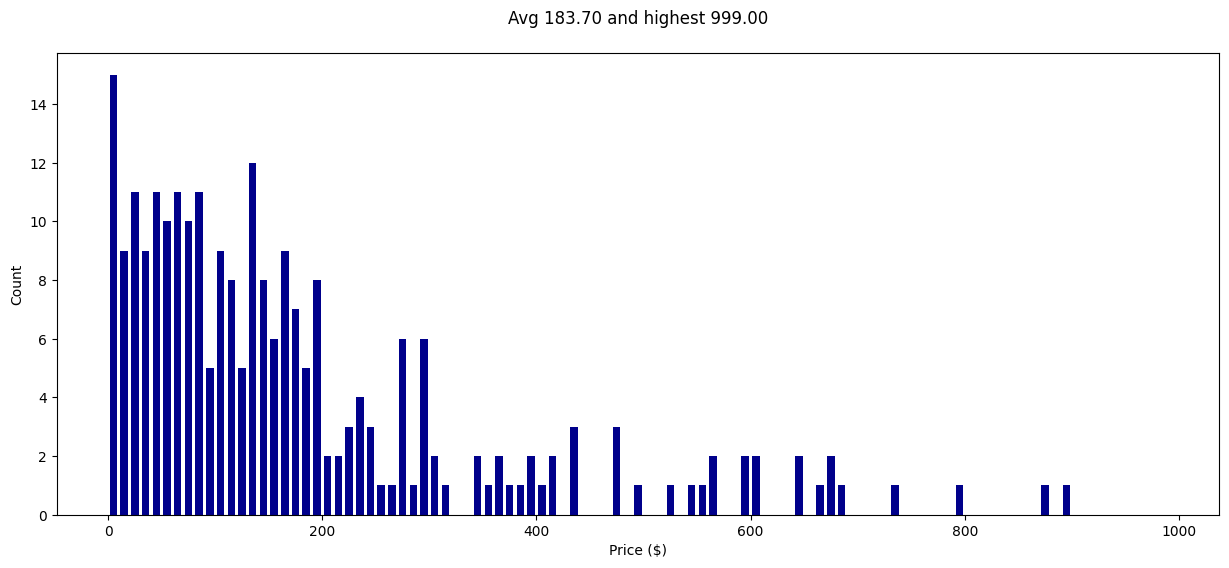

In [27]:
# Plot the distribution of prices in the first 250 test points

prices = [float(item.price) for item in test[:250]]
plt.figure(figsize=(15, 6))
plt.title(f"Avg {sum(prices)/len(prices):.2f} and highest {max(prices):,.2f}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="darkblue", bins=range(0, 1000, 10))
plt.show()

# Finally - upload your brand new dataset

Convert to prompts and upload to HuggingFace hub

In [28]:
train_prompts = [item.prompt for item in train]
train_prices = [item.price for item in train]
test_prompts = [item.test_prompt() for item in test]
test_prices = [item.price for item in test]

In [29]:
# Create a Dataset from the lists

train_dataset = Dataset.from_dict({"text": train_prompts, "price": train_prices})
test_dataset = Dataset.from_dict({"text": test_prompts, "price": test_prices})
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

In [31]:
import pickle 
# One more thing!
# Let's pickle the training and test dataset so we don't have to execute all this code next time!

with open('train.pkl', 'wb') as file:
    pickle.dump(train, file)

with open('test.pkl', 'wb') as file:
    pickle.dump(test, file)